Este Documento é meu bloco de anotações do curso de Data Visualization da Alura

## Importando Base de Dados

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv("tips.csv")
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [7]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
renomear = {
    'total_bill' : 'valor_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia',
    'time' : 'horario',
    'size' : 'qnt_pessoas'
}

In [9]:
gorjetas = dados.rename(columns = renomear)

In [10]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,qnt_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [11]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [14]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias_semana = {
    'Sun' : 'Domingo',
    'Sat' : 'Sabado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}
gorjetas.dia = gorjetas.dia.map(dias_semana)
gorjetas.dia.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [16]:
gorjetas.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
almoco_jantar = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}
gorjetas.horario = gorjetas.horario.map(almoco_jantar)
gorjetas.horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [18]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,qnt_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Importando o Seaborn


In [19]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 3.4MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [20]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


# Analise 1 - O valor gorjeta está associada ao valor da conta?

In [22]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia', 'horario', 'qnt_pessoas'], dtype='object')

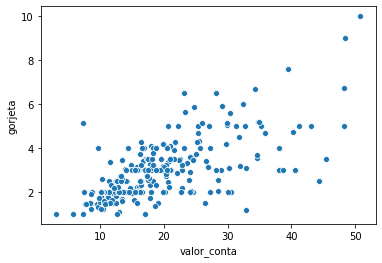

In [24]:
sns.scatterplot(x='valor_conta', y='gorjeta', data=gorjetas)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta aumenta**

In [29]:
print("A base de dados contém {} registros\n".format(gorjetas.shape[0]))
print("Registros não nulos")
gorjetas.count()

A base de dados contém 244 registros

Registros não nulos


valor_conta    244
gorjeta        244
sobremesa      244
dia            244
horario        244
qnt_pessoas    244
dtype: int64

## Criando Campo Porcentagem

In [30]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,qnt_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [31]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,qnt_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [33]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,qnt_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


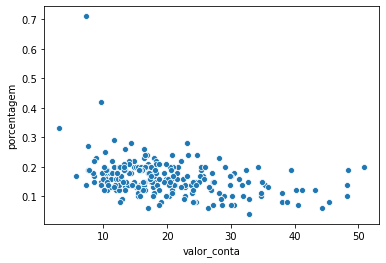

In [34]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

**Visualmente a porcentagem de gorjeta é inversamente proporcional ao valor da conta**

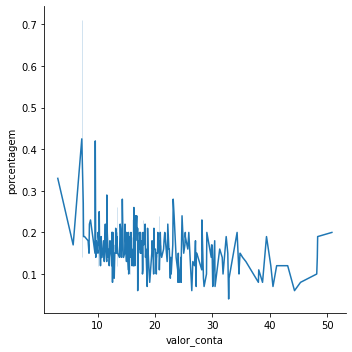

In [35]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=gorjetas)

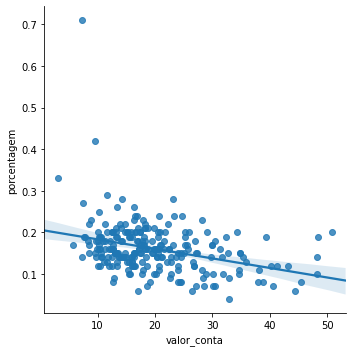

In [36]:
sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

# Analise 2 - Sobremesa

In [41]:
gorjetas[gorjetas.sobremesa=="Sim"].describe().round(2)

,valor_conta,gorjeta,qnt_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [43]:
gorjetas[gorjetas.sobremesa=="Não"].describe().round(2)

,valor_conta,gorjeta,qnt_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


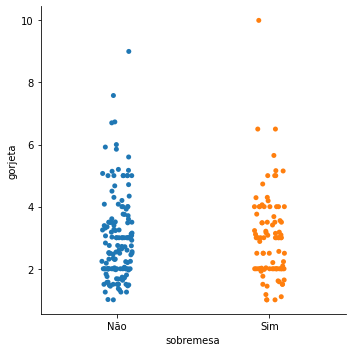

In [45]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

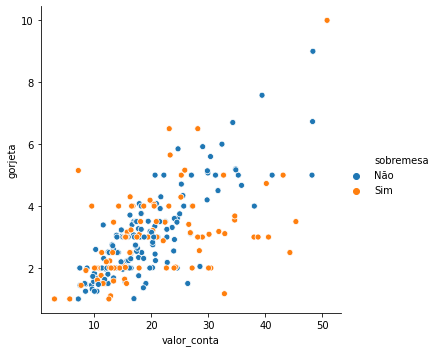

In [46]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

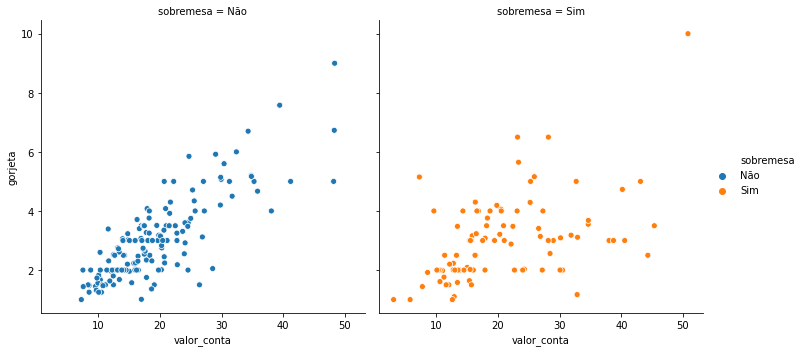

In [47]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

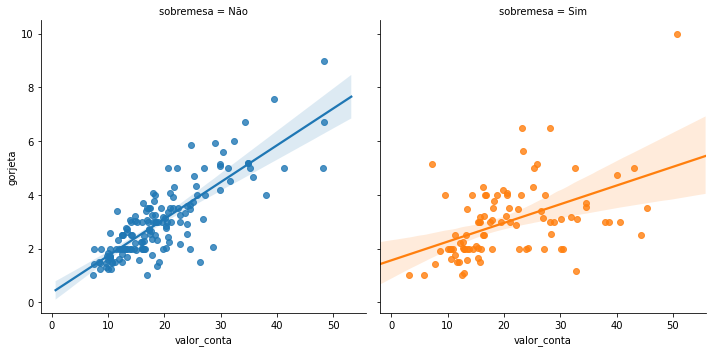

In [49]:
sns.lmplot(x='valor_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

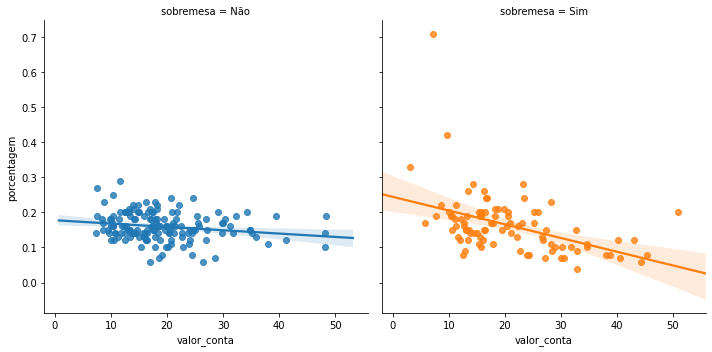

In [50]:
sns.lmplot(x='valor_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente existe uma diferença na gorjeta de quem pede  e de quem não pede gorjeta**

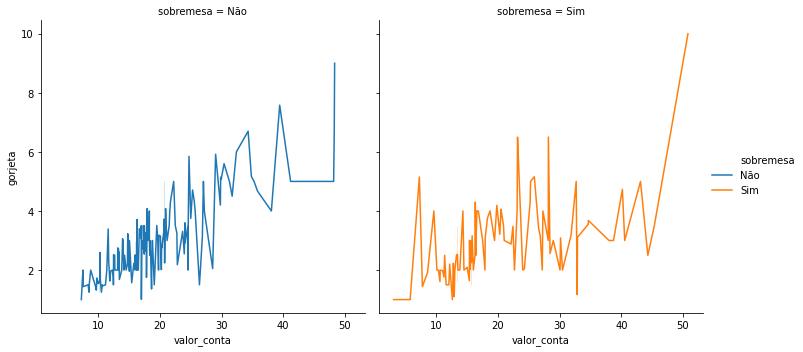

In [51]:
sns.relplot(x='valor_conta', y='gorjeta', kind='line', hue='sobremesa', col='sobremesa', data=gorjetas)

##Teste de Hipótese

**H<sup>null</sup>**

>**A distibuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta é diferente entre os grupos**

In [52]:
from scipy.stats import ranksums

In [55]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [58]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do pvalue é {}'.format(r.pvalue.round(2)))

O valor do pvalue é 0.53


**H<sup>null</sup>**

>**A distibuição da taxa da gorjeta é a mesma nos dois grupos**

# Analise 3 - Dia da Semana

In [59]:
gorjetas.dia.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

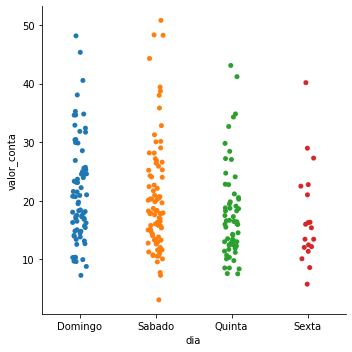

In [60]:
sns.catplot(x='dia', y='valor_conta', data=gorjetas)

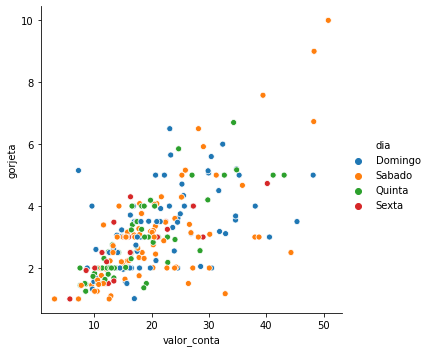

In [61]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia', data=gorjetas)

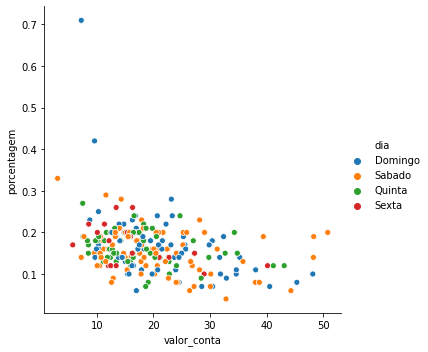

In [62]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia', data=gorjetas)

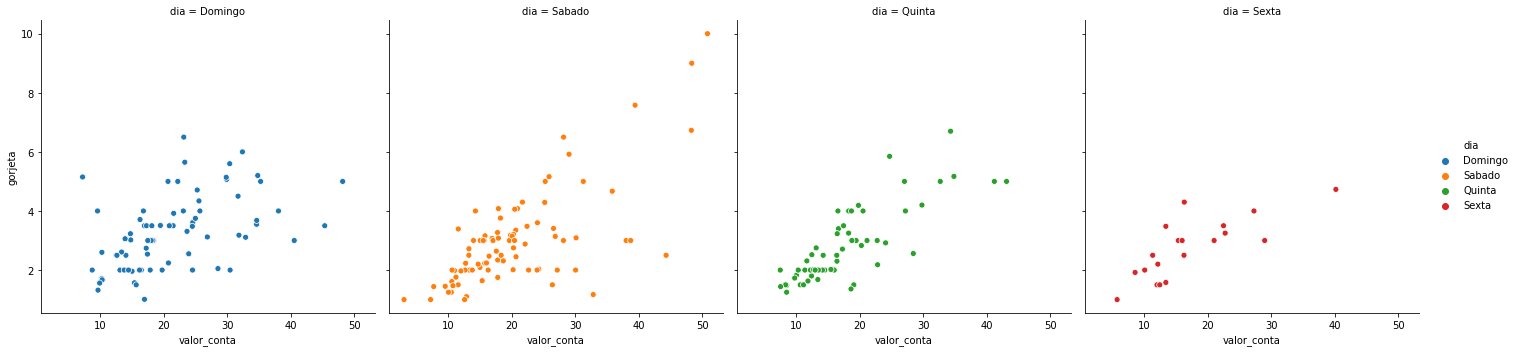

In [64]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia', col='dia', data=gorjetas)

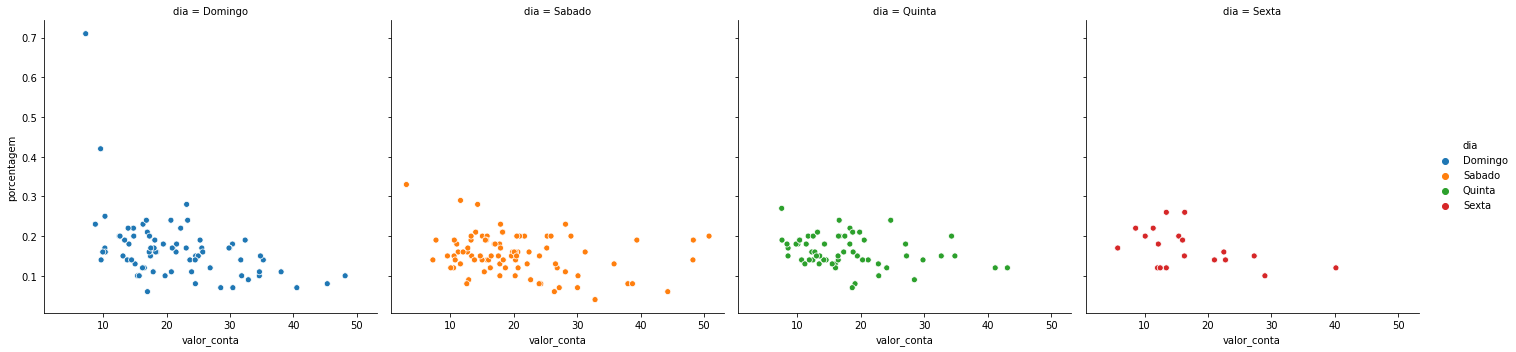

In [65]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia', col='dia', data=gorjetas)

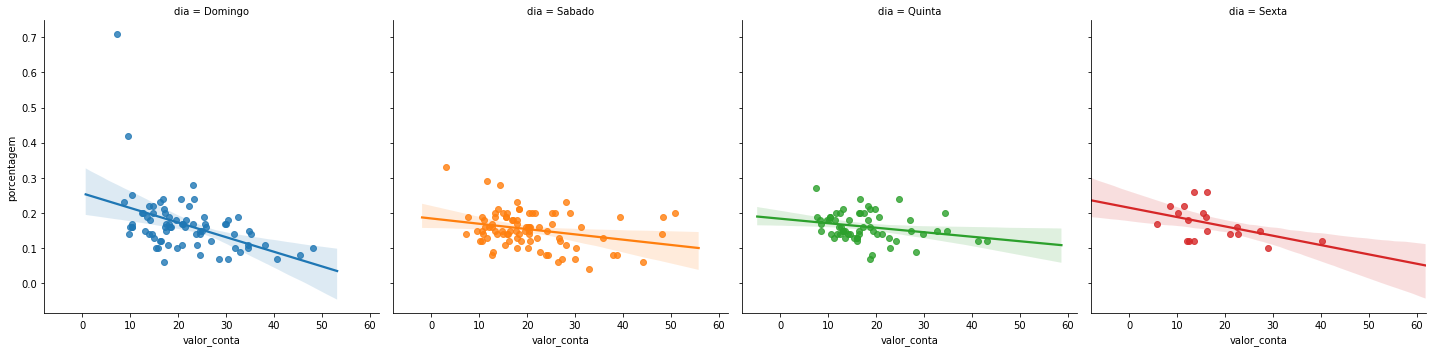

In [66]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia', col='dia', data=gorjetas)

In [71]:
media_gorjeta = gorjetas.gorjeta.mean()
print("media geral das gorjetas: {}".format(round(media_gorjeta,2)))

media geral das gorjetas: 3.0


In [75]:
gorjetas.groupby(['dia']).mean()[['valor_conta','gorjeta','porcentagem']].round(2)

,valor_conta,gorjeta,porcentagem
dia,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sabado,20.44,2.99,0.15
Sexta,17.15,2.73,0.17


In [77]:
print('Frequencia dos dias')
gorjetas['dia'].value_counts()

Frequencia dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

## Teste de Hipótese


**H<sup>null</sup>**

>**A distibuição do valor da conta é igual no sabado e domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta é diferente entre o sabado e domingo**

In [79]:
valor_conta_domingo = gorjetas.query("dia == 'Domingo'").valor_conta
valor_conta_sabado = gorjetas.query("dia == 'Sabado'").valor_conta

In [82]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O pvalue é de {}'.format(r2.pvalue.round(2)))

O pvalue é de 0.36


**H<sup>alt</sup>**
>**A distibuição do valor da conta é igual no sabado e domingo**

# Analise 4 - Almoço e Jantar

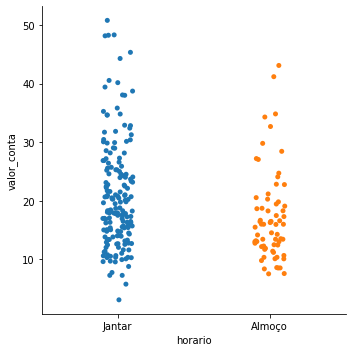

In [83]:
sns.catplot(x='horario', y='valor_conta', data=gorjetas)

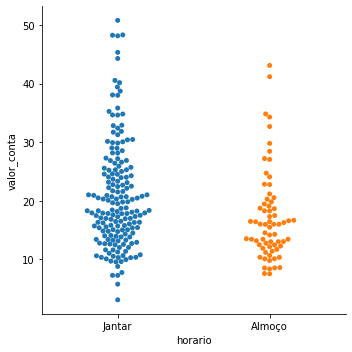

In [84]:
sns.catplot(x='horario', y='valor_conta', kind = 'swarm', data=gorjetas)

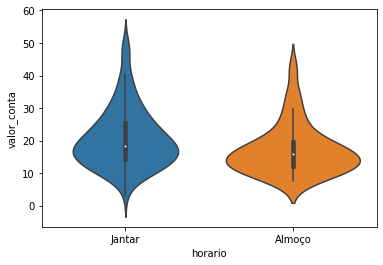

In [85]:
sns.violinplot(x='horario', y='valor_conta', data=gorjetas)

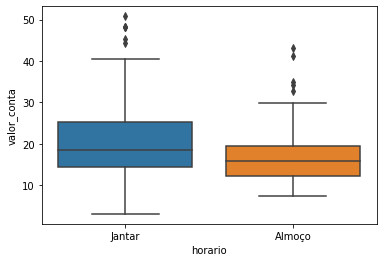

In [86]:
sns.boxplot(x='horario', y='valor_conta', data=gorjetas)

In [88]:
almoco = gorjetas.query("horario == 'Almoço'").valor_conta

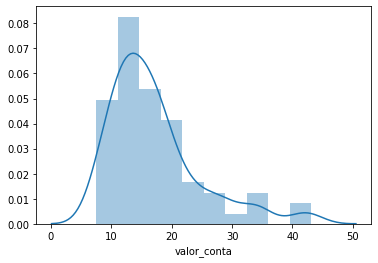

In [90]:
sns.distplot(almoco)

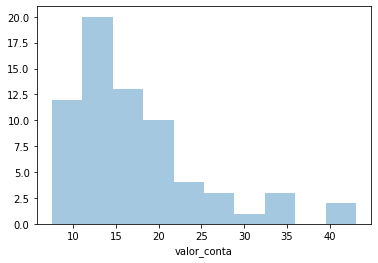

In [92]:
sns.distplot(almoco, kde=False)

In [93]:
jantar = gorjetas.query("horario == 'Jantar'").valor_conta

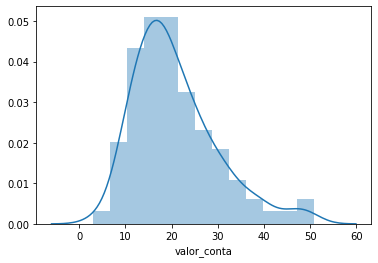

In [94]:
sns.distplot(jantar)

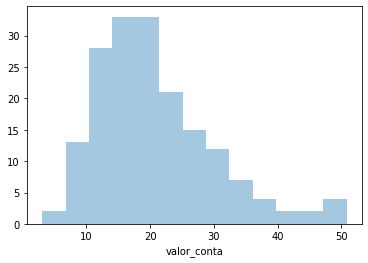

In [95]:
sns.distplot(jantar, kde=False)

In [97]:
gorjetas.groupby(['horario']).mean()[['valor_conta','gorjeta','porcentagem']].round(2)

,valor_conta,gorjeta,porcentagem
horario,,,
Almoço,17.17,2.73,0.16
Jantar,20.80,3.10,0.16


## Teste de Hipótese

**H<sup>null</sup>**

>**A distibuição do valor da conta é igual no almoço e jantar**

**H<sup>alt</sup>**

>**A distribuição do valor da conta é diferente entre o almoço e jantar**

In [101]:
r3 = ranksums(jantar, almoco)
print("O pvalue é de {}".format(r3.pvalue.round(3)))

O pvalue é de 0.001


**H<sup>alt</sup>**

>**A distribuição do valor da conta é diferente entre o almoço e jantar**



Os grupos são diferentes se o pvalue for menor que 0.05

In [110]:
porcentagem_almoco = gorjetas.query("horario == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("horario == 'Jantar'").porcentagem

## Teste de Hipotése 2

**H<sup>null</sup>**

>**A distibuição da taxa da gorjeta é igual no almoço e jantar**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta é diferente entre o almoço e jantar**

In [113]:
r4 = ranksums(porcentagem_jantar, porcentagem_almoco)
print("O pvalue é de {}".format(r4.pvalue.round(3)))

O pvalue é de 0.26


**H<sup>null</sup>**

>**A distibuição da taxa da gorjeta é igual no almoço e jantar**